# Project: TMDB Movie Data

## Table of Contents

<ul>
<li><a href="#intro">Dataset introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Dataset introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), over 56 years from 1960 to 2015. The data currently have 10866 entries with 21 columns (features).  

### Questions to be investigated and selected variables:

1. What kinds of properties are associated with movies that have high revenues?
  - revenue_adj as dependent variable
  - budget
  - popularity
  - vote_average
2. Which genres are most popular from year to year?
  - popularity as dependent variable
  - genres
3. Who are the top rated directors?
  - directors
  - average votes 
4. What is the relationship between a movie's popularity and budget?
  - popularity
  - budget_adj

In [402]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None 

<a id='wrangling'></a>

## Data Wrangling

### General Properties

I imported the data from a csv file and printed out the first 5 rows to understand the overview. I found there are a few columns with values of multiple elements, for example the genre column, thus I expected these columns may need to be optimised by separating individual genres when analysed.  <br> As a first step, I tried understanding the number of columns and entries, number of unique values and data types in each column, by using `info()` and `nunique()` functions. <br> As it's expected that the IDs and IMDB IDs should be unique for each movie, the difference of 10 between the two columns indicates that either there is missing data or duplicated values. Thus I checked missing and duplicated values of the data and considered which missing data should be filled in or dropped. 

#### Data import and overview

In [403]:
tmdb = pd.read_csv("tmdb-movies.csv")

In [404]:
print(tmdb.shape)

(10866, 21)


In [405]:
#Finding columns with missing values
print(tmdb.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


#### Missing and duplicated values

Using `isnull( )` function, I found the below list of missing values. Since my questions won't be related to the homepage, tagline, keywords or overview, these null values can be ignored. <br> However, there are 10 missing values in imdb_id, 44 in directors and 23 in genres which may be related to my analysis, considering these values cannot be auto-filled, I will drop the rows with N/A in these columns in the next step.<br>
There is 1 record that is duplicated, which should be removed. 

In [406]:
#Finding columns with duplicated values 
duplicated_values = tmdb[tmdb.duplicated()]
#print(duplicated_values)

#### Zero values and outliers 

In [407]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above description of the data, some of the numerical data have zero values, including budget, revenue, budget_adj and revenue_adj. The medians of these values are zero, meaning over half of the data has zero value. For these rows I will fill in the values with mean in the next step. <br>
The outliers for the columns popularity and revenue, revenue_adj are also recognizable from the description. For these rows I will remove in the next step. <br> 

### Data cleaning

This step involved dealing with missing values and dropping duplicates, organising the dataframe for more precise description. <br>
Firstly, I dropped all rows with missing values in director, genres or imdb_id. <br>
Secondly, I dropped the 1 entry of duplicated values that I identified in the previous step. <br>
Lastly, since my questions won't be related to columns such as homepage, tagline, keywords, etc., I decided to remove them from dataset. 
When the data is cleaned, I performed more descriptive functions such as `info()`. 

Dropping rows with missing data in imdb_id, director or genres, and dropping irrelevant columns:

In [408]:
#Drop N/A
tmdb = tmdb.dropna(subset=["imdb_id", "director", "genres"])

In [409]:
#Drop duplicates if needed
tmdb = tmdb.drop_duplicates()

In [410]:
#Drop irrelevant columns to this report
tmdb.drop(["homepage", "tagline", "keywords", "overview", "runtime", "production_companies", "release_date", "cast", "budget","revenue"], axis=1, inplace=True)

Cleaning outliers and zero value rows:

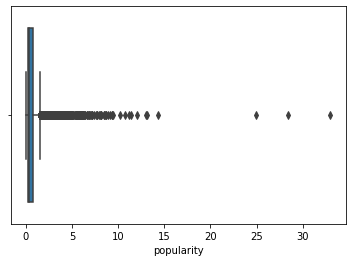

In [411]:
#Identifying outliers
sns.boxplot(x=tmdb["popularity"]);

In [412]:
#Cleaning up outliers of over 10 popularity from the data
tmdb = tmdb[tmdb["popularity"] <= 10]

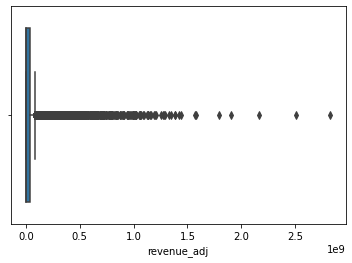

In [413]:
sns.boxplot(x=tmdb["revenue_adj"]);

In [414]:
#Cleaning up outliers of over 1.5e8 adjusted revenue from the data
tmdb = tmdb[tmdb["revenue_adj"] <= 1.5e8]

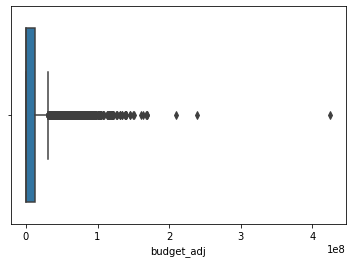

In [415]:
sns.boxplot(x=tmdb["budget_adj"]);

In [416]:
#Cleaning up outliers of over 2e8 adjusted budget from the data
tmdb = tmdb[tmdb["budget_adj"] <= 2e8]

By this step, all missing data, duplication, and extreme outliers have been removed, but there are still some cells with zero value. 

In [417]:
#Masking zero-values cells as N/A
tmdb["revenue_adj"] = tmdb["revenue_adj"].mask(tmdb["revenue_adj"]==0)
tmdb["budget_adj"] = tmdb["budget_adj"].mask(tmdb["budget_adj"]==0)

In [418]:
#Removing N/A
tmdb = tmdb.dropna(subset=["budget_adj", "revenue_adj"])
tmdb.describe()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2.817000e+03,2.817000e+03
mean,43944.075257,0.824707,264.604899,6.069010,2001.826411,2.913486e+07,4.585829e+07
std,71027.429310,0.736639,393.549154,0.801686,10.729865,2.638642e+07,4.099285e+07
min,5.000000,0.001117,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,9102.000000,0.389554,50.000000,5.500000,1996.000000,9.812786e+06,1.076277e+07
50%,12437.000000,0.636839,130.000000,6.100000,2005.000000,2.163338e+07,3.396103e+07
75%,42297.000000,1.019569,317.000000,6.600000,2010.000000,4.000000e+07,7.369541e+07
max,343795.000000,8.947905,5923.000000,8.400000,2015.000000,1.697166e+08,1.499921e+08


Now the dataset is ready for analysis, however, the size of the dataset was reduced to only 2817 entries, which is a small sample size which is a limiatation. 

<a id='eda'></a>

## Exploratory Data Analysis

### General inspection

I used the below code to get an overview of which two variables may be correlated. 

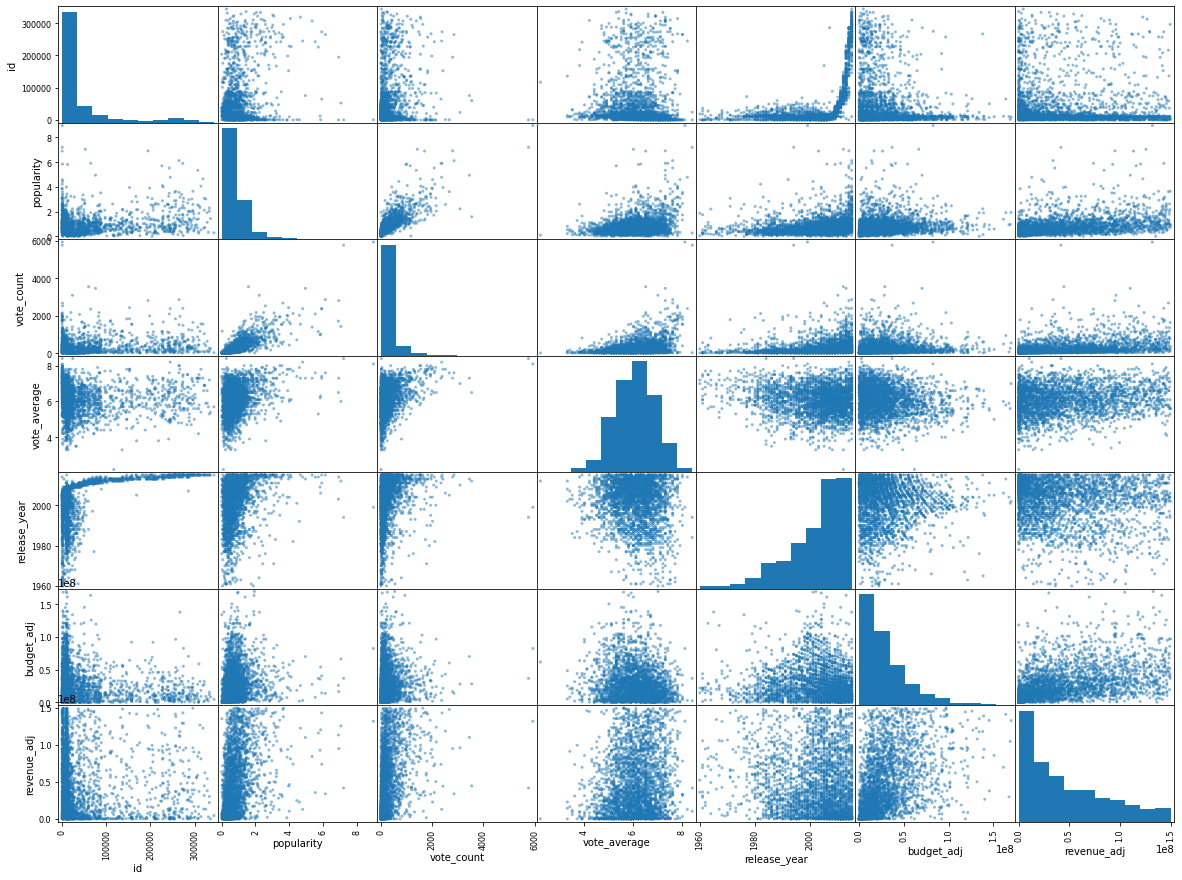

In [419]:
pd.plotting.scatter_matrix(tmdb, figsize=(20,15));

### Research Question 1 What kinds of properties are associated with movies that have high revenues?

For understanding what factors contribute to higher revenues, I assessed 3 independent variables: popularity, budget, and average votes. <br>
I used Numpy's `quantile()` function to identify where the 25%, 50%, 75% quantiles are, in order to group the revenue data into four categories: top 25% with the highest revenues are categorised as "Highest Revenue", the rest of the data are categorised as "High Revenue", "Low Revenue" and "Lowest Revenue". I expect to use this information to arrange my histograms in this question. 

In [420]:
#Creating a new column that contains categorical revenue data based on quartiles calculated via Numpy
bin_edges = [tmdb["revenue_adj"].min(), np.quantile(tmdb["revenue_adj"], 0.25), np.quantile(tmdb["revenue_adj"], 0.5), np.quantile(tmdb["revenue_adj"], 0.75), tmdb["revenue_adj"].max()]
bin_names = ["Lowest", "Low", "High", "Highest"]
tmdb["revenue_category"] = pd.cut(tmdb["revenue_adj"], bin_edges, labels=bin_names)

#### Popularity and revenues

In this section, I created a histogram with x-axis being the popularity level, and y-axis being the number of films. Each histogram represents one category of revenue. The four categories showed clear difference in where the majority of them fall in the popularity spectrum. <br>

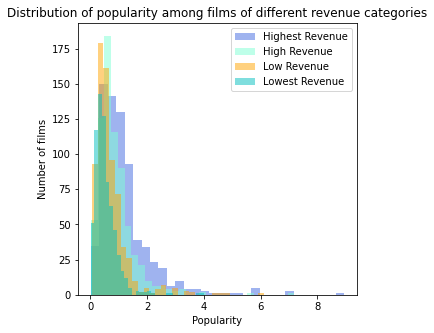

In [429]:
#Plot the distribution of revenues in each of the above popularity category
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(tmdb[tmdb["revenue_category"]=="Highest"]["popularity"], alpha=0.5, bins=30, label="Highest Revenue", color="royalblue")
ax.hist(tmdb[tmdb["revenue_category"]=="High"]["popularity"], alpha=0.5, bins=30, label="High Revenue", color="aquamarine")
ax.hist(tmdb[tmdb["revenue_category"]=="Low"]["popularity"], alpha=0.5, bins=30, label="Low Revenue", color="orange")
ax.hist(tmdb[tmdb["revenue_category"]=="Lowest"]["popularity"], alpha=0.5, bins=30, label="Lowest Revenue", color="c")
                     
ax.legend(loc="upper right")
ax.set_title("Distribution of popularity among films of different revenue categories")
ax.set_xlabel("Popularity")
ax.set_ylabel("Number of films");

We can clearly see that the higher the popularity is, the more likely that the movie is in a higher revenue category. The mean of the highest revenue group of films has a mean popularity of 2.03, a median of 1.48; the high revenue group's mean and median are 0.98 and 0.78; for the low revenue group they are 0.67 and 0.51; and lastly the lowest revenue ones 0.49 and 0.4. 

#### Budget and revenues

Similar to the above graph, I plotted four histograms based on their budget. The trend is same as in popularity, that films with higher budgets tend to involve higher budgets. 

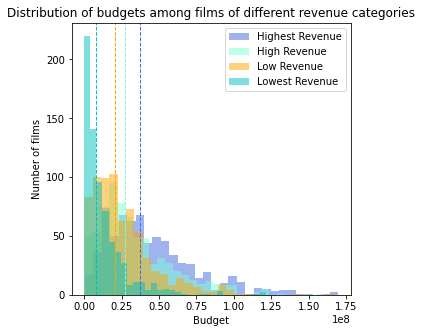

In [428]:
#Budget and revenues
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(tmdb[tmdb["revenue_category"]=="Highest"]["budget_adj"], alpha=0.5, bins=30, label="Highest Revenue", color="royalblue")
plt.axvline(tmdb[tmdb["revenue_category"]=="Highest"]["budget_adj"].median(), color='royalblue', linestyle='dashed', linewidth=1)

ax.hist(tmdb[tmdb["revenue_category"]=="High"]["budget_adj"], alpha=0.5, bins=30, label="High Revenue", color="aquamarine")
plt.axvline(tmdb[tmdb["revenue_category"]=="High"]["budget_adj"].median(), color='aquamarine', linestyle='dashed', linewidth=1)

ax.hist(tmdb[tmdb["revenue_category"]=="Low"]["budget_adj"], alpha=0.5, bins=30, label="Low Revenue", color="orange")
plt.axvline(tmdb[tmdb["revenue_category"]=="Low"]["budget_adj"].median(), color='orange', linestyle='dashed', linewidth=1)

ax.hist(tmdb[tmdb["revenue_category"]=="Lowest"]["budget_adj"], alpha=0.5, bins=30, label="Lowest Revenue",color="c")
plt.axvline(tmdb[tmdb["revenue_category"]=="Lowest"]["budget_adj"].median(), color='c', linestyle='dashed', linewidth=1)
                     
ax.legend(loc="upper right")
ax.set_title("Distribution of budgets among films of different revenue categories")
ax.set_xlabel("Budget")
ax.set_ylabel("Number of films");

The correlation between budget and revenue is also very clear in this graph, the medians of each revenue group (as marked by the dash lines) is higher as revenues get higher. 

#### Rating and revenues

In this step the average votes, i.e. ratings were graphed.


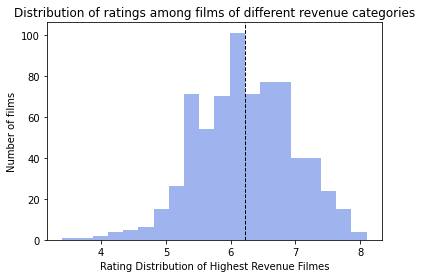

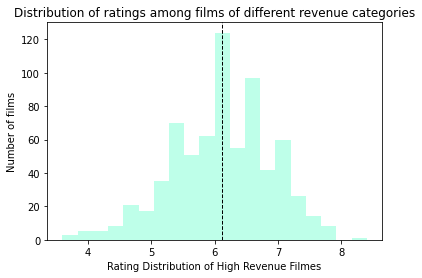

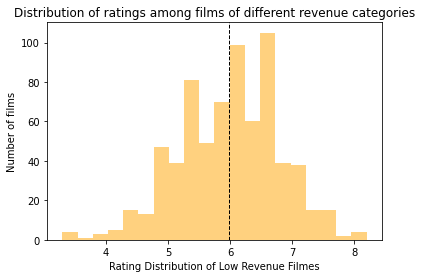

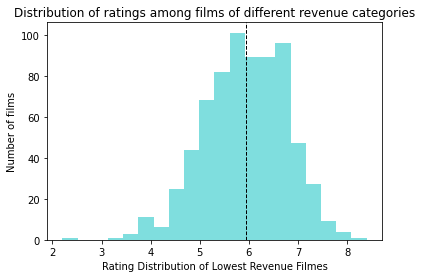

In [423]:
#Vote_average and revenues
plt.subplots()

plt.hist(tmdb[tmdb["revenue_category"]=="Highest"]["vote_average"], alpha=0.5, bins=20, label="Highest Revenue", color="royalblue")
plt.axvline(tmdb[tmdb["revenue_category"]=="Highest"]["vote_average"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of ratings among films of different revenue categories")
plt.xlabel("Rating Distribution of Highest Revenue Filmes")
plt.ylabel("Number of films")
plt.show()

plt.hist(tmdb[tmdb["revenue_category"]=="High"]["vote_average"], alpha=0.5, bins=20, label="High Revenue", color="aquamarine")
plt.axvline(tmdb[tmdb["revenue_category"]=="High"]["vote_average"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of ratings among films of different revenue categories")
plt.xlabel("Rating Distribution of High Revenue Filmes")
plt.ylabel("Number of films")
plt.show()

plt.hist(tmdb[tmdb["revenue_category"]=="Low"]["vote_average"], alpha=0.5, bins=20, label="Low Revenue", color="orange")
plt.axvline(tmdb[tmdb["revenue_category"]=="Low"]["vote_average"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of ratings among films of different revenue categories")
plt.xlabel("Rating Distribution of Low Revenue Filmes")
plt.ylabel("Number of films")
plt.show()

plt.hist(tmdb[tmdb["revenue_category"]=="Lowest"]["vote_average"], alpha=0.5, bins=20, label="Lowest Revenue", color="c")
plt.axvline(tmdb[tmdb["revenue_category"]=="Lowest"]["vote_average"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title("Distribution of ratings among films of different revenue categories")
plt.xlabel("Rating Distribution of Lowest Revenue Filmes")
plt.ylabel("Number of films")
plt.show()

Interestingly, all four histograms are located around the same mean and median, and they all have a more or less normal distribution. Thus we can conclude that the graphs did not indicate correlations between the rating and revenues. 

### Research Question 2 Which genres are most popular from year to year? 

#### Creating one column per genre

I used `get_dummies()` function to create one column for each genre, just so each genre could be used to analyse data later.

In [424]:
genre = tmdb["genres"].str.get_dummies(sep='|')
tmdb = pd.concat([tmdb, genre], axis=1, sort=False)
tmdb.head()
genre_list = list(genre.columns.values)

#### Plotting 
In the function below, I first extracted all films that belong to a certain genre, and then created a dataframe composed only of the release year and the popularity of the set of films. Later, I found that there are genres that weren't present in all the 56-year period, for example there is no animation film in 1960 in our dataset, so I filled in those years with a 0 value. Lastly the moving averages of popularity of each genre is calculated and plotted. 

In execution phase, I passed the list of genres extracted from the original dataframe to the function and plotted a time series graph. As the plot got crowded, I chose a handful of genres that I am interested in and plotted them. 

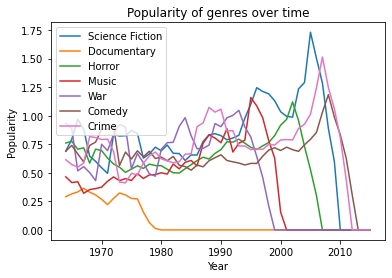

In [425]:
#Preparing data for x-axis
years = sorted(tmdb["release_year"].unique())

#Defining a function to perform the plotting
def plot_genres(genre):
    df_genre = tmdb[tmdb[genre] == 1]
    genre_pop = df_genre.groupby(["release_year"])["popularity"].mean()
    genre_pop.columns = ["release_year", "avg_popularity"]
    missing_yrs = [x for x in years if x not in sorted(df_genre["release_year"].unique())]
    #filling in missing years
    for yr in missing_yrs:
        genre_pop.loc[yr] = 0
    five_year_avg = genre_pop.rolling(window=5).mean()
    plt.plot(figsize=(12,8))
    plt.plot(years, five_year_avg, label=genre)
    plt.legend(loc="upper left")
    plt.title("Popularity of genres over time")
    plt.ylabel("Popularity")
    plt.xlabel("Year")
    

#Calling the above function on a list of genres that are of interest
for genre in ["Science Fiction", "Documentary", "Horror", "Music", "War", "Comedy", "Crime"]:
    plot_genres(genre)

Due to missing data for most of the movies after the cleaning step, all genres showed a sharp decrease from late 1990s, which may lead to partial conclusion of the trends of genres. 

### Research Question 3 What is the relationship between a movie's popularity and budget?
In the next step, I used popularity data as x-axis, and budget data as y-axis to draw a scatter plot. And then I used Numpy to draw the regressional line of the dataset. 

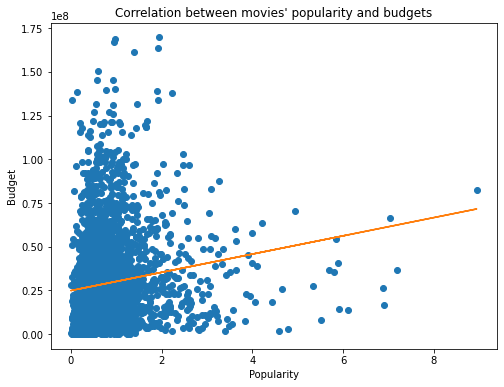

In [426]:
plt.figure(figsize=(8,6))
#Plotting scatter dots
x = np.array(tmdb["popularity"])
y = np.array(tmdb["budget_adj"])
plt.plot(x, y, "o")
#Plotting regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.title("Correlation between movies' popularity and budgets")
plt.ylabel("Budget")
plt.xlabel("Popularity")
plt.show()

The data shows a positive correlation between films' popularity and budget, although chances remain that some movies are moderately popular despite their high budgets, and vice versa. 

### Research Question 4  Who are the highest-rated directors?

To answer this question, I grouped the data per director and calculated the average votings their works received using `groupby()` function, and then simply `sort()` the data and print the top 30 rows. 

In [427]:
director_avg_votes = tmdb.groupby(["director"])[["vote_average"]].mean()
top_directors = director_avg_votes.sort_values("vote_average", ascending = False)
print(top_directors.head(30))

                                   vote_average
director                                       
Damien Chazelle                            8.20
Lenny Abrahamson                           8.00
Xavier Dolan                               8.00
Tony Kaye                                  8.00
Bryan Singer                               8.00
Louis C.K.                                 7.90
Ashutosh Gowariker                         7.80
Lucy Walker                                7.80
Jaco Van Dormael                           7.80
Rajkumar Hirani                            7.80
Ari Folman                                 7.70
Robert Mulligan                            7.70
Giuseppe Tornatore                         7.70
Stanley Kubrick                            7.64
Stephen Chbosky                            7.60
Tate Taylor                                7.60
Dan Gilroy                                 7.60
Mark Herman                                7.60
Terry Gilliam|Terry Jones               

<a id='conclusions'></a>

## Conclusions

In summary, we found that higher revenue is correlated with popularity and budgets, but not with average votes. The correlation does not imply causation but if I were a film producer who aim to achieve high revenues, it might be worth researching into whether I should increase my budget and consider more marketing for the film or not. Ratings and revenues do not have significant correlation. Thus good news for even if a film producer does not get high revenue, s/he may still get very high rating. <br>

From the second question, there is a lack of data for the selected genres from late 1990s, but we can see the science fictions are top of the chart during the period from late 1970s to 1970s, although popularity declined from late 1980s. Documentary's popularity is in a decline, even with high interest compared to other periods during 1970s and 1980s, it was still more niche than other genres. <br>
Crime movies is mostly as popular as science fictions. Musical films used to be the most popular genre during 1960s. Musical films and horror films are very close in terms of popularity from 1970s to 2010s.   <br>

For the third question, the scatter plot and regressional line showed a positive correlation between the budget and the popularity of movies, while there are significant amount of films are made with low budget but enjoyed high popularity. 

For the last question, I found the top 30 rated directors as shown in the list printed above. 

#### Limitations

The size of the dataset was reduced from 10866 to just 2817 after cleaning up missing and duplicated data and extreme outliers. This sample size is very small compared to the original dataset, thus the results in this report cannot directly be generalised for the entire movie industry. <br>

While plotting the popularity of different genres, due to missing data for most of the movies after the cleaning step, all genres showed a sharp decrease from late 1990s, which may lead to partial conclusion of the trends of genres. 